# Q/Python in Jupyter

## Load/Prep Environment

In [1]:
\l importmatplotlib.q
\c 200 200
printSep:{100#"="}
nyseDataDir:sv[`;] each `:NYSE_data,/: key `:NYSE_data
readInData:{((count "," vs first read0 x)#"*";enlist ",") 0: x}
nyseFundamental_pre:readInData nyseDataDir 0
nysePriceSplit_pre:("PSFFFFF";enlist ",") 0: nyseDataDir 1
nysePrice_pre:("PSFFFFF";enlist ",") 0: nyseDataDir 2
nyseSecurities_pre:readInData nyseDataDir 3

## Visual Inspection of Data
Note: nyseFundamental_pre and nyseSecurities_pre has columns that do not go well with q hence this has to be changed eventually
   
    

In [2]:
first nyseFundamental_pre
first nysePriceSplit_pre
first nysePrice_pre
first nyseSecurities_pre

x                                                  | ,"0"
Ticker Symbol                                      | "AAL"
Period Ending                                      | "2012-12-31"
Accounts Payable                                   | "3068000000.0"
Accounts Receivable                                | "-222000000.0"
Add'l income/expense items                         | "-1961000000.0"
After Tax ROE                                      | "23.0"
Capital Expenditures                               | "-1888000000.0"
Capital Surplus                                    | "4695000000.0"
Cash Ratio                                         | "53.0"
Cash and Cash Equivalents                          | "1330000000.0"
Changes in Inventories                             | "0.0"
Common Stocks                                      | "127000000.0"
Cost of Revenue                                    | "10499000000.0"
Current Ratio                                      | "78.0"
Deferred Asset Charges          

date  | 2016.01.05D00:00:00.000000000
symbol| `WLTW
open  | 123.43
close | 125.84
low   | 122.31
high  | 126.25
volume| 2163600f


date  | 2016.01.05D00:00:00.000000000
symbol| `WLTW
open  | 123.43
close | 125.84
low   | 122.31
high  | 126.25
volume| 2163600f


Ticker symbol          | "MMM"
Security               | "3M Company"
SEC filings            | "reports"
GICS Sector            | "Industrials"
GICS Sub Industry      | "Industrial Conglomerates"
Address of Headquarters| "St. Paul, Minnesota"
Date first added       | ""
CIK                    | "0000066740"


In [3]:
/
It might be useful to key on date and symbols
\

nysePriceSplit_post:2!nysePriceSplit_pre
nysePrice_post:2!nysePrice_pre
10#select from nysePriceSplit_post where symbol = `AAPL

10?select distinct symbol from nysePrice_post

date                          symbol| open     close    low      high     volume       
------------------------------------| -------------------------------------------------
2010.01.04D00:00:00.000000000 AAPL  | 30.49    30.57286 30.34    30.64286 1.234324e+008
2010.01.05D00:00:00.000000000 AAPL  | 30.65714 30.62571 30.46428 30.79857 1.504762e+008
2010.01.06D00:00:00.000000000 AAPL  | 30.62571 30.13857 30.10714 30.74714 1.3804e+008  
2010.01.07D00:00:00.000000000 AAPL  | 30.25    30.08286 29.86429 30.28572 1.192828e+008
2010.01.08D00:00:00.000000000 AAPL  | 30.04286 30.28286 29.86572 30.28572 1.119027e+008
2010.01.11D00:00:00.000000000 AAPL  | 30.4     30.01571 29.77857 30.42857 1.155574e+008
2010.01.12D00:00:00.000000000 AAPL  | 29.88428 29.67429 29.48857 29.96714 1.486149e+008
2010.01.13D00:00:00.000000000 AAPL  | 29.69572 30.09286 29.15714 30.13286 1.51473e+008 
2010.01.14D00:00:00.000000000 AAPL  | 30.01571 29.91857 29.86    30.06571 1.082235e+008
2010.01.15D00:00:00.000000000 AA

symbol
------
SYMC  
RHI   
ADM   
LLL   
PPL   
CAT   
CMCSA 
FITB  
CMCSA 
RCL   


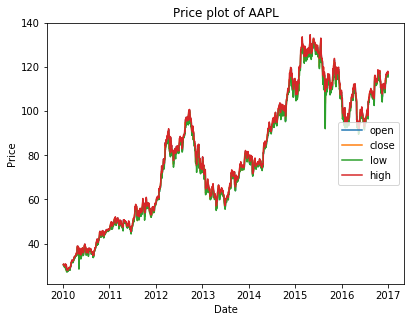

"===================================================================================================="


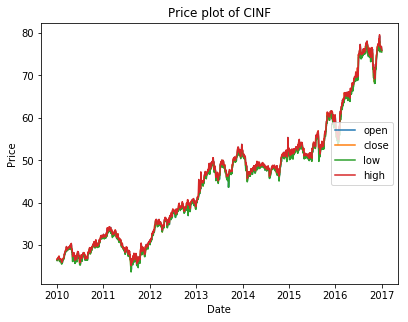

In [4]:
plt:.p.import`matplotlib.pyplot
date:.p.import[`datetime]`:date
np:.p.import[`numpy]

plotStockPrices:{
    if[99h=type x;x:0!x];
    /nested use of embedPy since date is sent as int to python
    pydates:np[`:array][<;] {date[>;x 0;x 1;x 2]} each "J"$"." vs' string `date$x`date; 
    plt[`:plot][pydates;x`open];
    plt[`:plot][pydates;x`close];
    plt[`:plot][pydates;x`low];
    plt[`:plot][pydates;x`high];
    /plt[`:bar][pydates;x`volume];
    plt[`:xlabel]["Date"];
    plt[`:ylabel]["Price"];
    plt[`:title]["Price plot of ",string first[x]`symbol];
    plt[`:legend][`open`close`low`high;`loc pykw "right"];
    plt[`:show][];
 }
plotStockPrices aaplData:select from nysePriceSplit_post where symbol = `AAPL
printSep`
plotStockPrices cinfData:select from nysePriceSplit_post where symbol = `CINF

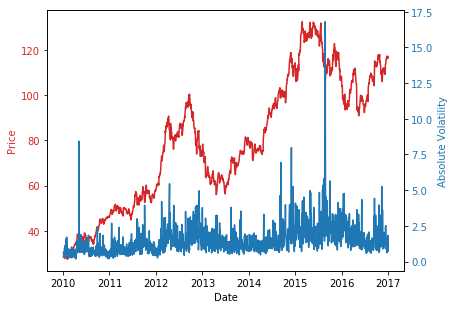

"===================================================================================================="


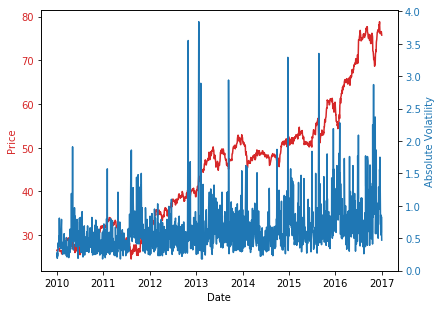

In [5]:
priceManipulation:{tmp:update avgIntradayPrice: avg each (high,'low), 
    absoluteDeviation: -[high;low]
    from x;
    update date:date.date, proportionalDeviation: "F"$.Q.f[5;] each %[absoluteDeviation;avgIntradayPrice] from tmp}
plotStockVariation:{
    if[99h=type x;x:0!x];
    pydates:np[`:array][<;] {date[>;x 0;x 1;x 2]} each "J"$"." vs' string `date$x`date; 
    set[;plt[`:subplot][]] each `fig`subplt1;
    color:"tab:red";
    subplt1[`:set_xlabel] "Date";
    subplt1[`:set_ylabel] ["Price"; `color pykw color];
    subplt1[`:plot][pydates;x`avgIntradayPrice; `color pykw color];
    subplt1[`:tick_params][`axis pykw "y"; `labelcolor pykw color];
    
    subplt2:subplt1[`:twinx][];
    color:"tab:blue";
    subplt2[`:set_ylabel]["Absolute Volatility"; `color pykw color];
    subplt2[`:plot][pydates;x`absoluteDeviation; `color pykw color];
    subplt2[`:tick_params][`axis pykw "y"; `labelcolor pykw color];
   
    /fig[`:tight_layout][];
    
    plt[`:show][];
 }
plotStockVariation priceManipulation aaplData
printSep`
plotStockVariation priceManipulation cinfData

In [9]:
/TensorFlow

tf:.p.import`tensorflow
x1:tf[`:constant] til 10
.p.eval["print"] x1;

Tensor("Const_1:0", shape=(10,), dtype=int64)


Help on package tensorflow:

NAME
    tensorflow

DESCRIPTION
    # Copyright 2015 The TensorFlow Authors. All Rights Reserved.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    # ==============================================================================

PACKAGE CONTENTS
    contrib (package)
    core (package)
    examples (package)
    python (package)
    tensorboard (package)
    tools (package)

SUBMODULES
    app
    compat
    errors
  

Help on package tensorflow:

NAME
    tensorflow

DESCRIPTION
    # Copyright 2015 The TensorFlow Authors. All Rights Reserved.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    # ==============================================================================

PACKAGE CONTENTS
    contrib (package)
    core (package)
    examples (package)
    python (package)
    tensorboard (package)
    tools (package)

SUBMODULES
    app
    compat
    errors
  